Craig Glassbrenner
Statistical deep dive into the La Crosse County housing market.
Data retrieved from the La Crosse County website.

In the rest of the document, the data is retrieved from html/json files and cleaned. Statistical summaries for the main stats are displayed and then some graphs to visualize the data and see trends or changes on evaluations from 2018 to 2019.

In [1]:
#Imports
import random
import pandas as pd
import os
import json
from bs4 import BeautifulSoup

In [2]:
# Building Dictonary based on data about certain parcelId
def build_record(id):
	filepathH = os.path.join('/Users/craigglassbrenner/Desktop/WebScraping/data/html', 'p' + str(id) + '-2019.html')
	html = open(filepathH, 'r')

	filepath19 = os.path.join('/Users/craigglassbrenner/Desktop/WebScraping/data/json2019', 'p' + str(id) + '-2019.json')
	json19 = open(filepath19, 'r')

	filepath18 = os.path.join('/Users/craigglassbrenner/Desktop/WebScraping/data/json2018', 'p' + str(id) + '-2018.json')
	json18 = open(filepath18, 'r')

	soup = BeautifulSoup(html, "html.parser")
	s = soup.get_text()
	s = s.split('\n')
	
	munc = s[0]
	acreage = s[1]
	city = s[2]
	address = s[3]

	myTax19 = json19.read()
	myTax19 = myTax19.split('\n')

	impAVal = myTax19[1]
	impFMVal = myTax19[2]
	landAVal = myTax19[3]
	landFMVal = myTax19[4]
	totAVal = myTax19[5]
	totFMVal = myTax19[6]

	myTax18 = json18.read()
	myTax18 = myTax18.split('\n')

	impAVal18 = myTax18[1]
	impFMVal18 = myTax18[2]
	landAVal18 = myTax18[3]
	landFMVal18 = myTax18[4]
	totAVal18 = myTax18[5]
	totFMVal18 = myTax18[6]

	toReturn =   {  'Muncipality' : munc,
					'Acreage' : acreage,
					'City' : city,
					'Address' : address,
					'ImprovementAssessedValue2019' : impAVal,
					'ImprovementFairMarketValue2019' : impFMVal,
					'LandAssessedValue2019' : landAVal,
					'LandFairMarketValue2019' : landFMVal,
					'TotalAssessedValue2019' : totAVal,
					'TotalFairMarketValue2019' : totFMVal,
					'ImprovementAssessedValue2018' : impAVal18,
					'ImprovementFairMarketValue2018' : impFMVal18,
					'LandAssessedValue2018' : landAVal18,
					'LandFairMarketValue2018' : landFMVal18,
					'TotalAssessedValue2018' : totAVal18,
					'TotalFairMarketValue2018' : totFMVal18 }

	return toReturn

In [3]:
# Verfying that that parcelId actually exists in our files
def verifyID(id):
	filepath = os.path.join('/Users/craigglassbrenner/Desktop/WebScraping/data/html', 'p' + str(id) + '-2019.html')

	try:
		open(filepath, 'r')
		return True

	except:
		return False

In [4]:
# Source of randomness, building entire dictonary
random.seed(24)
i=0

main_dict = {}
while(i < 1000):
    parcelId = random.randint(1, 73033)

    if(verifyID(parcelId)):
        main_dict.update({ parcelId : build_record(parcelId)})
        i = i + 1


In [5]:
# Cleaning data
for i in list(main_dict):
    if(main_dict[i]['Muncipality'] == 'None' or main_dict[i]['Acreage'] == '0' or main_dict[i]['City'] == 'None'):
        main_dict.pop(i)
    elif(main_dict[i]['ImprovementAssessedValue2019'] == '0' and 
            main_dict[i]['ImprovementFairMarketValue2019'] == '0' and 
            main_dict[i]['LandAssessedValue2019'] == '0' and 
            main_dict[i]['LandFairMarketValue2019'] == '0' and 
            main_dict[i]['TotalAssessedValue2019'] == '0' and 
            main_dict[i]['TotalFairMarketValue2019'] == '0' and 
            main_dict[i]['ImprovementAssessedValue2018'] == '0' and 
            main_dict[i]['ImprovementFairMarketValue2018'] == '0' and 
            main_dict[i]['LandAssessedValue2018'] == '0' and 
            main_dict[i]['LandFairMarketValue2018'] == '0' and 
            main_dict[i]['TotalAssessedValue2018'] == '0' and 
            main_dict[i]['TotalFairMarketValue2018'] == '0'):
        main_dict.pop(i)
    i = i + 1

# Create DataFrame from the dictionary
df = pd.DataFrame.from_dict(main_dict, orient = 'index')
        
        
        

Cleaned up the data by getting rid of any parcel that didn't have any taxes for the past two years or the parcel had some error like it had no acreage or didn't belong to any Municipality, had no City value. Cut 209 parcels. 

In [6]:
# Displaying and Exporting Data
df[["Acreage", "ImprovementAssessedValue2019", "ImprovementAssessedValue2018" , "LandAssessedValue2019", "LandAssessedValue2018", "TotalAssessedValue2019", "TotalAssessedValue2018"]] = df[["Acreage", "ImprovementAssessedValue2019", "ImprovementAssessedValue2018", "LandAssessedValue2019", "LandAssessedValue2018", "TotalAssessedValue2019", "TotalAssessedValue2018"]].apply(pd.to_numeric)
df[["ImprovementFairMarketValue2019", "ImprovementFairMarketValue2018", "LandFairMarketValue2019" , "LandFairMarketValue2018", "TotalFairMarketValue2019", "TotalFairMarketValue2018"]] = df[["ImprovementFairMarketValue2019", "ImprovementFairMarketValue2018", "LandFairMarketValue2019" , "LandFairMarketValue2018", "TotalFairMarketValue2019", "TotalFairMarketValue2018"]].apply(pd.to_numeric)

df.to_csv('/Users/craigglassbrenner/Desktop/WebScraping/dataframe.csv')
display(df)

,Muncipality,Acreage,City,Address,ImprovementAssessedValue2019,ImprovementFairMarketValue2019,LandAssessedValue2019,LandFairMarketValue2019,TotalAssessedValue2019,TotalFairMarketValue2019,ImprovementAssessedValue2018,ImprovementFairMarketValue2018,LandAssessedValue2018,LandFairMarketValue2018,TotalAssessedValue2018,TotalFairMarketValue2018
23933,City of La Crosse,1.800,LA CROSSE,601 ST ANDREW ST,34700,37700,258000,280100,292700,317800,34700,41500,258000,308600,292700,350100
12031,Town of Holland,0.810,HOLMEN,W7771 COUNTRY AVE,252100,323900,25800,33200,277900,357100,252100,304300,25800,31100,277900,335400
37143,City of La Crosse,0.138,LA CROSSE,2617 LOSEY BLVD S,96700,105000,18200,19800,114900,124800,81100,97000,15400,18400,96500,115400
15152,Town of Onalaska,0.500,ONALASKA,N5893 COTTAGE LN,125300,161200,15000,19300,140300,180500,125300,151900,15000,18200,140300,170100
58224,City of Onalaska,0.100,ONALASKA,3711 EMERALD DR E,206300,208500,18600,18800,224900,227300,153200,166800,24500,26700,177700,193500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21164,Village of Holmen,0.270,HOLMEN,1703 PINECREST AVE,176800,172000,43100,41900,219900,213900,128400,151200,27000,31800,155400,183000
38616,City of La Crosse,0.189,LA CROSSE,3212 GLENDALE AVE,211700,229900,23100,25100,234800,255000,173100,207100,22800,27300,195900,234400
44805,City of Onalaska,0.290,ONALASKA,217 LARKSPUR LN E,297500,300600,50000,50500,347500,351100,257400,280300,41900,45600,299300,325900
37157,City of La Crosse,0.138,LA CROSSE,2509 SUNRISE DR,116600,126600,20200,21900,136800,148500,93600,112000,16200,19400,109800,131400


Summary Statistics: (Typically comparing 2019 to 2018 for each category)

In [7]:
print('Acreage Max: %f' % df['Acreage'].max())
print('Acreage Min: %f' % df['Acreage'].min())
print('Acreage Mean: %f' % df['Acreage'].mean())
print('Acreage STD: %f' % df['Acreage'].std())


Acreage Max: 76.100000
Acreage Min: 0.010000
Acreage Mean: 5.123105
Acreage STD: 11.178447


In [8]:
print('Improvement Assessed Value 2019 Max vs 2018 Max:   %.3f vs %.3f' % (df['ImprovementAssessedValue2019'].max(), df['ImprovementAssessedValue2018'].max()))
print('Improvement Assessed Value 2019 Min vs 2018 Min:   %.3f vs %.3f' % (df['ImprovementAssessedValue2019'].min(), df['ImprovementAssessedValue2018'].min()))
print('Improvement Assessed Value 2019 Mean vs 2018 Mean: %.3f vs %.3f' % (df['ImprovementAssessedValue2019'].mean(), df['ImprovementAssessedValue2018'].mean()))
print('Improvement Assessed Value 2019 STD vs 2018 STD:   %.3f vs %.3f' % (df['ImprovementAssessedValue2019'].std(), df['ImprovementAssessedValue2018'].std()))

Improvement Assessed Value 2019 Max vs 2018 Max:   37924600.000 vs 37924600.000
Improvement Assessed Value 2019 Min vs 2018 Min:   0.000 vs 0.000
Improvement Assessed Value 2019 Mean vs 2018 Mean: 243399.368 vs 210344.753
Improvement Assessed Value 2019 STD vs 2018 STD:   1580021.607 vs 1398763.241


In [9]:
print('Improvement Fair Market Value 2019 Max vs 2018 Max:    %.3f vs %.3f' % (df['ImprovementFairMarketValue2019'].max(), df['ImprovementFairMarketValue2018'].max()))
print('Improvement Fair Market Value 2019 Min vs 2018 Min:    %.3f vs %.3f' % (df['ImprovementFairMarketValue2019'].min(), df['ImprovementFairMarketValue2018'].min()))
print('Improvement Fair Market Value 2019 Mean vs 2018 Mean:  %.3f vs %.3f' % (df['ImprovementFairMarketValue2019'].mean(), df['ImprovementFairMarketValue2018'].mean()))
print('Improvement Fair Market Value 2019 STD vs 2018 STD:    %.3f vs %.3f ' % (df['ImprovementFairMarketValue2019'].std(), df['ImprovementFairMarketValue2018'].std()))

Improvement Fair Market Value 2019 Max vs 2018 Max:    41179400.000 vs 45367600.000
Improvement Fair Market Value 2019 Min vs 2018 Min:    0.000 vs 0.000
Improvement Fair Market Value 2019 Mean vs 2018 Mean:  254814.791 vs 233124.652
Improvement Fair Market Value 2019 STD vs 2018 STD:    1715570.519 vs 1669173.211 


In [10]:
print('Land Assessed Value 2019 Max vs 2018 Max:    %.3f vs %.3f' % (df['LandAssessedValue2019'].max(), df['LandAssessedValue2018'].max()))
print('Land Assessed Value 2019 Min vs 2018 Min:    %.3f vs %.3f' % (df['LandAssessedValue2019'].min(), df['LandAssessedValue2018'].min()))
print('Land Assessed Value 2019 Mean vs 2018 Mean:  %.3f vs %.3f' % (df['LandAssessedValue2019'].mean(), df['LandAssessedValue2018'].mean()))
print('Land Assessed Value 2019 STD vs 2018 STD:    %.3f vs %.3f ' % (df['LandAssessedValue2019'].std(), df['LandAssessedValue2018'].std()))

Land Assessed Value 2019 Max vs 2018 Max:    1388600.000 vs 1133100.000
Land Assessed Value 2019 Min vs 2018 Min:    100.000 vs 0.000
Land Assessed Value 2019 Mean vs 2018 Mean:  48869.722 vs 43328.445
Land Assessed Value 2019 STD vs 2018 STD:    104713.609 vs 92819.476 


In [11]:
print('Land Fair Market Value 2019 Max vs 2018 Max:    %.3f vs %.3f' % (df['LandFairMarketValue2019'].max(), df['LandFairMarketValue2018'].max()))
print('Land Fair Market Value 2019 Min vs 2018 Min:    %.3f vs %.3f' % (df['LandFairMarketValue2019'].min(), df['LandFairMarketValue2018'].min()))
print('Land Fair Market Value 2019 Mean vs 2018 Mean:  %.3f vs %.3f' % (df['LandFairMarketValue2019'].mean(), df['LandFairMarketValue2018'].mean()))
print('Land Fair Market Value 2019 STD vs 2018 STD:    %.3f vs %.3f ' % (df['LandFairMarketValue2019'].std(), df['LandFairMarketValue2018'].std()))

Land Fair Market Value 2019 Max vs 2018 Max:    1403300.000 vs 1355500.000
Land Fair Market Value 2019 Min vs 2018 Min:    0.000 vs 0.000
Land Fair Market Value 2019 Mean vs 2018 Mean:  49475.727 vs 46465.613
Land Fair Market Value 2019 STD vs 2018 STD:    112519.363 vs 110214.801 


In [12]:
print('Total Assessed Value 2019 Max vs 2018 Max:    %.3f vs %.3f' % (df['TotalAssessedValue2019'].max(), df['TotalAssessedValue2018'].max()))
print('Total Assessed Value 2019 Min vs 2018 Min:    %.3f vs %.3f' % (df['TotalAssessedValue2019'].min(), df['TotalAssessedValue2018'].min()))
print('Total Assessed Value 2019 Mean vs 2018 Mean:  %.3f vs %.3f' % (df['TotalAssessedValue2019'].mean(), df['TotalAssessedValue2018'].mean()))
print('Total Assessed Value 2019 STD vs 2018 STD:    %.3f vs %.3f ' % (df['TotalAssessedValue2019'].std(), df['TotalAssessedValue2018'].std()))

Total Assessed Value 2019 Max vs 2018 Max:    38848800.000 vs 38848800.000
Total Assessed Value 2019 Min vs 2018 Min:    100.000 vs 0.000
Total Assessed Value 2019 Mean vs 2018 Mean:  292269.090 vs 253673.198
Total Assessed Value 2019 STD vs 2018 STD:    1637283.809 vs 1447038.463 


In [13]:
print('Total Fair Market Value 2019 Max vs 2018 Max:    %.3f vs %.3f' % (df['TotalFairMarketValue2019'].max(), df['TotalFairMarketValue2018'].max()))
print('Total Fair Market Value 2019 Min vs 2018 Min:    %.3f vs %.3f' % (df['TotalFairMarketValue2019'].min(), df['TotalFairMarketValue2018'].min()))
print('Total Fair Market Value 2019 Mean vs 2018 Mean:  %.3f vs %.3f' % (df['TotalFairMarketValue2019'].mean(), df['TotalFairMarketValue2018'].mean()))
print('Total Fair Market Value 2019 STD vs 2018 STD:    %.3f vs %.3f ' % (df['TotalFairMarketValue2019'].std(), df['TotalFairMarketValue2018'].std()))

Total Fair Market Value 2019 Max vs 2018 Max:    42182900.000 vs 46473200.000
Total Fair Market Value 2019 Min vs 2018 Min:    0.000 vs 0.000
Total Fair Market Value 2019 Mean vs 2018 Mean:  304290.518 vs 279590.265
Total Fair Market Value 2019 STD vs 2018 STD:    1777737.270 vs 1726578.372 


In [14]:
df['Muncipality'].value_counts()

City of La Crosse            250
City of Onalaska              88
Town of Holland               62
Village of Holmen             60
Town of Shelby                48
Town of Onalaska              37
Town of Farmington            33
Town of Greenfield            33
Village of West Salem         31
Town of Hamilton              24
Town of Burns                 22
Town of Campbell              21
Town of Barre                 19
Town of Bangor                19
Town of Medary                15
Town of Washington            12
Village of Bangor             12
Village of Rockland            5
Name: Muncipality, dtype: int64

This also shows us the number of different municipalites 
that we sampled and how many properties we sampled from each different municipality.

In [15]:
df['City'].value_counts()

LA CROSSE      363
HOLMEN         136
ONALASKA       125
WEST SALEM      63
BANGOR          48
MINDORO         20
COON VALLEY     15
ROCKLAND        11
STODDARD         4
MELROSE          4
WESTBY           2
Name: City, dtype: int64

Chose not to include Address in summary stats as it wouldn't give us any interesting data. 

Pearson Correlation Coefficient:

In [16]:
#Pearson Correlation Table
pearsonCorr = df.corr(method= 'pearson')
pearsonCorr

,Acreage,ImprovementAssessedValue2019,ImprovementFairMarketValue2019,LandAssessedValue2019,LandFairMarketValue2019,TotalAssessedValue2019,TotalFairMarketValue2019,ImprovementAssessedValue2018,ImprovementFairMarketValue2018,LandAssessedValue2018,LandFairMarketValue2018,TotalAssessedValue2018,TotalFairMarketValue2018
Acreage,1.000000,-0.005575,-0.020898,0.012919,-0.066280,-0.004554,-0.024362,-0.012608,-0.028299,0.021331,-0.062641,-0.010820,-0.031356
ImprovementAssessedValue2019,-0.005575,1.000000,0.999426,0.523618,0.529160,0.998514,0.997969,0.938967,0.938634,0.560248,0.563145,0.943579,0.943374
ImprovementFairMarketValue2019,-0.020898,0.999426,1.000000,0.521396,0.529715,0.997818,0.998558,0.938272,0.939111,0.558629,0.564287,0.942803,0.943908
LandAssessedValue2019,0.012919,0.523618,0.521396,1.000000,0.992179,0.569261,0.565962,0.457414,0.453579,0.973384,0.962492,0.504591,0.499939
LandFairMarketValue2019,-0.066280,0.529160,0.529715,0.992179,1.000000,0.574109,0.574485,0.461606,0.460518,0.971816,0.975532,0.508542,0.507479
TotalAssessedValue2019,-0.004554,0.998514,0.997818,0.569261,0.574109,1.000000,0.999262,0.935382,0.934815,0.602907,0.605006,0.942850,0.942355
TotalFairMarketValue2019,-0.024362,0.997969,0.998558,0.565962,0.574485,0.999262,1.000000,0.934678,0.935418,0.600604,0.606299,0.942021,0.943020
ImprovementAssessedValue2018,-0.012608,0.938967,0.938272,0.457414,0.461606,0.935382,0.934678,1.000000,0.999225,0.495894,0.496976,0.998447,0.997727
ImprovementFairMarketValue2018,-0.028299,0.938634,0.939111,0.453579,0.460518,0.934815,0.935418,0.999225,1.000000,0.492391,0.496790,0.997474,0.998464
LandAssessedValue2018,0.021331,0.560248,0.558629,0.973384,0.971816,0.602907,0.600604,0.495894,0.492391,1.000000,0.992000,0.543495,0.539344


In [17]:
# Creating net change columns for each variable of interest
df['IAVDiff'] = df['ImprovementAssessedValue2019'] - df['ImprovementAssessedValue2018']
df['IFMVDiff'] = df['ImprovementFairMarketValue2019'] - df['ImprovementFairMarketValue2018']
df['LAVDiff'] = df['LandAssessedValue2019'] - df['LandAssessedValue2018']
df['LFMVDiff'] = df['LandFairMarketValue2019'] - df['LandFairMarketValue2018']
df['TotAVDiff'] = df['TotalAssessedValue2019'] - df['TotalAssessedValue2018']
df['TotFMDiff'] = df['TotalFairMarketValue2019'] - df['TotalFairMarketValue2018']

Net Change Stats:

In [18]:
print('Improvement Assessed Value:    %.3f' % df['IAVDiff'].mean())
print('Improvement Fair Market Value: %.3f' % df['IFMVDiff'].mean())
print('Land Assessed Value:           %.3f' % df['LAVDiff'].mean())
print('Land Fair Market Value:        %.3f' % df['LFMVDiff'].mean())
print('Total Assessed Value:          %.3f' % df['TotAVDiff'].mean())
print('Total Fair Market Value:       %.3f' % df['TotFMDiff'].mean())

Improvement Assessed Value:    33054.614
Improvement Fair Market Value: 21690.139
Land Assessed Value:           5541.277
Land Fair Market Value:        3010.114
Total Assessed Value:          38595.891
Total Fair Market Value:       24700.253


% Change Stats:

In [19]:
# Creating percent change columns
df['PIAV'] = (df['ImprovementAssessedValue2019'] - df['ImprovementAssessedValue2018']) / df.shape[0]
df['PIFMV'] = (df['ImprovementFairMarketValue2019'] - df['ImprovementFairMarketValue2018']) / df.shape[0]
df['PLAV'] = (df['LandAssessedValue2019'] - df['LandAssessedValue2018']) / df.shape[0]
df['PLFMV'] = (df['LandFairMarketValue2019'] - df['LandFairMarketValue2018']) / df.shape[0]
df['PTotAV'] = (df['TotalAssessedValue2019'] - df['TotalAssessedValue2018']) / df.shape[0]
df['PTotFM'] = (df['TotalFairMarketValue2019'] - df['TotalFairMarketValue2018']) / df.shape[0]

print('Percent Improvement Assessed Value:    %.2f' % df['PIAV'].mean())
print('Percent Improvement Fair Market Value: %.2f' % df['PIFMV'].mean())
print('Percent Land Assessed Value:           %.2f' % df['PLAV'].mean())
print('Percent Land Fair Market Value:        %.2f' % df['PLFMV'].mean())
print('Percent Total Assessed Value:          %.2f' % df['PTotAV'].mean())
print('Percent Total Fair Market Value:       %.2f' % df['PTotFM'].mean())

Percent Improvement Assessed Value:    41.79
Percent Improvement Fair Market Value: 27.42
Percent Land Assessed Value:           7.01
Percent Land Fair Market Value:        3.81
Percent Total Assessed Value:          48.79
Percent Total Fair Market Value:       31.23


Net Change by Municipality:

In [20]:
df[['Muncipality', 'PIAV', 'PIFMV', 'PLAV', 'PLFMV', 'PTotAV', 'PTotFM']].groupby(['Muncipality']).sum()

,PIAV,PIFMV,PLAV,PLFMV,PTotAV,PTotFM
Muncipality,,,,,,
City of La Crosse,27255.120101,17731.099874,2155.120101,230.973451,29410.240202,17962.073325
City of Onalaska,2591.656131,699.747155,1784.070796,1207.964602,4375.726928,1907.711757
Town of Bangor,221.365360,23.008850,36.283186,2.907712,257.648546,25.916561
Town of Barre,14.791403,44.753477,0.000000,9.481669,14.791403,54.235145
Town of Burns,0.000000,10.745891,1.896334,5.436157,1.896334,16.182048
Town of Campbell,12.010114,51.201011,0.000000,5.815424,12.010114,57.016435
Town of Farmington,0.000000,188.748420,0.000000,34.892541,0.000000,223.640961
Town of Greenfield,16.561315,17.572693,-0.379267,0.758534,16.182048,18.331226
Town of Hamilton,0.000000,237.041719,-1.896334,73.957016,-1.896334,310.998736


In [21]:
# Displaying and calculating value per acre for each parcel
df['AssessedValPerAcre'] = (df['TotalAssessedValue2019'] / df['Acreage'])
df['FairMarketValPerAcre'] = (df['TotalFairMarketValue2019'] / df['Acreage'])

df[['AssessedValPerAcre', 'FairMarketValPerAcre']]

,AssessedValPerAcre,FairMarketValPerAcre
23933,1.626111e+05,1.765556e+05
12031,3.430864e+05,4.408642e+05
37143,8.326087e+05,9.043478e+05
15152,2.806000e+05,3.610000e+05
58224,2.249000e+06,2.273000e+06
...,...,...
21164,8.144444e+05,7.922222e+05
38616,1.242328e+06,1.349206e+06
44805,1.198276e+06,1.210690e+06
37157,9.913043e+05,1.076087e+06


In [22]:
# Getting summary stats about value per acre
minAssessedVal = df['AssessedValPerAcre'].min()
maxAssessedVal = df['AssessedValPerAcre'].max()
minFairMarketVal = df['FairMarketValPerAcre'].min()
maxFairMarketVal = df['FairMarketValPerAcre'].max()

print('Land Value per Acre: ')
print('Minimum Assessed Value: %.3f' % minAssessedVal)
print('Maximum Assessed Value: %.3f' % maxAssessedVal)
print('Minimum Fair Market Value: %.3f' % minFairMarketVal)
print('Maximum Fair Market Value: %.3f' % maxFairMarketVal)

Land Value per Acre: 
Minimum Assessed Value: 5.000
Maximum Assessed Value: 12451538.462
Minimum Fair Market Value: 0.000
Maximum Fair Market Value: 13520160.256


In [23]:
#Imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [24]:
m_groupby = df.groupby('Muncipality')

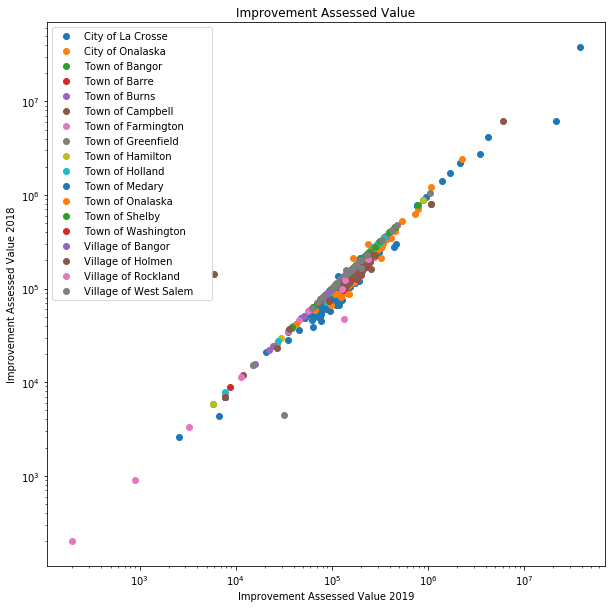

In [25]:
# Graphs
fig, ax = plt.subplots(figsize=(10,10))
for label, subdf in m_groupby:
    plt.loglog(subdf['ImprovementAssessedValue2019'], subdf['ImprovementAssessedValue2018'], 'o', label=label)
    
plt.title('Improvement Assessed Value')
plt.xlabel('Improvement Assessed Value 2019')
plt.ylabel('Improvement Assessed Value 2018')
plt.legend()

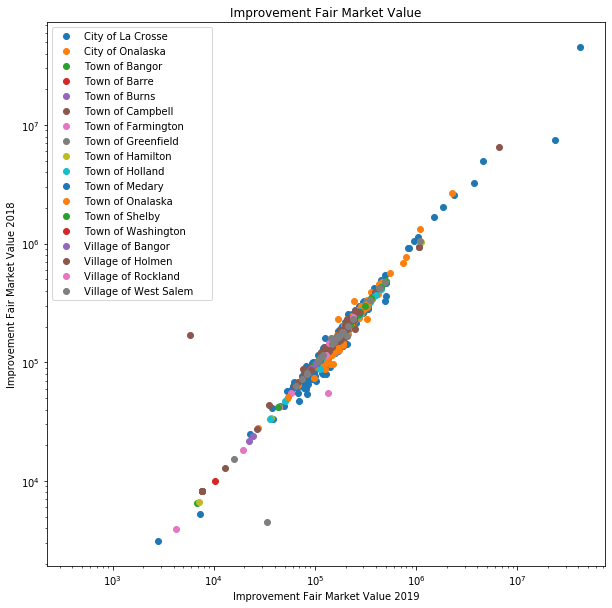

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
for label, subdf in m_groupby:
    plt.loglog(subdf['ImprovementFairMarketValue2019'], subdf['ImprovementFairMarketValue2018'], 'o', label=label)
    
plt.title('Improvement Fair Market Value')
plt.xlabel('Improvement Fair Market Value 2019')
plt.ylabel('Improvement Fair Market Value 2018')
plt.legend()

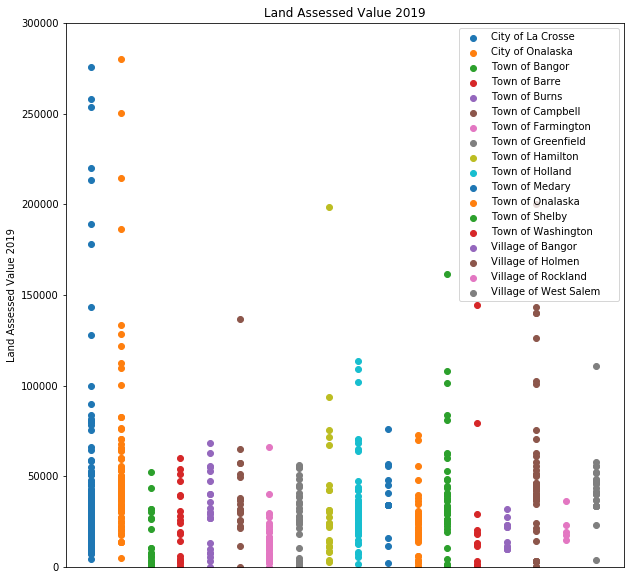

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set(ylim=(0, 300000))
ax.axes.get_xaxis().set_visible(False)
for label, subdf in m_groupby:
    plt.scatter( subdf['Muncipality'] , subdf['LandAssessedValue2019'], label=label)
    
plt.title('Land Assessed Value 2019')
plt.ylabel('Land Assessed Value 2019')
plt.legend()

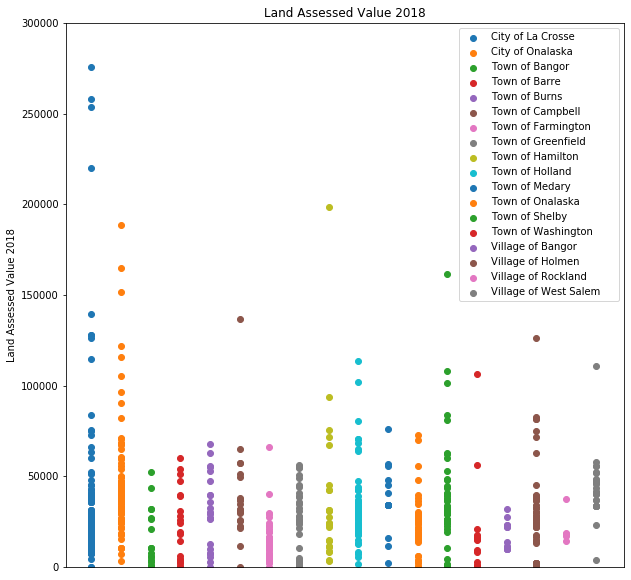

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set(ylim=(0, 300000))
ax.axes.get_xaxis().set_visible(False)
for label, subdf in m_groupby:
    plt.scatter( subdf['Muncipality'] , subdf['LandAssessedValue2018'], label=label)
    
plt.title('Land Assessed Value 2018')
plt.ylabel('Land Assessed Value 2018')
plt.legend()

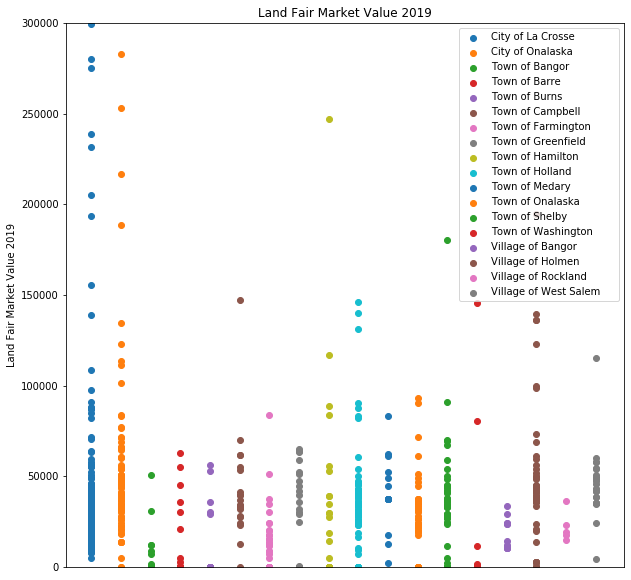

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set(ylim=(0, 300000))
ax.axes.get_xaxis().set_visible(False)
for label, subdf in m_groupby:
    plt.scatter( subdf['Muncipality'] , subdf['LandFairMarketValue2019'], label=label)
    
plt.title('Land Fair Market Value 2019')
plt.ylabel('Land Fair Market Value 2019')
plt.legend()

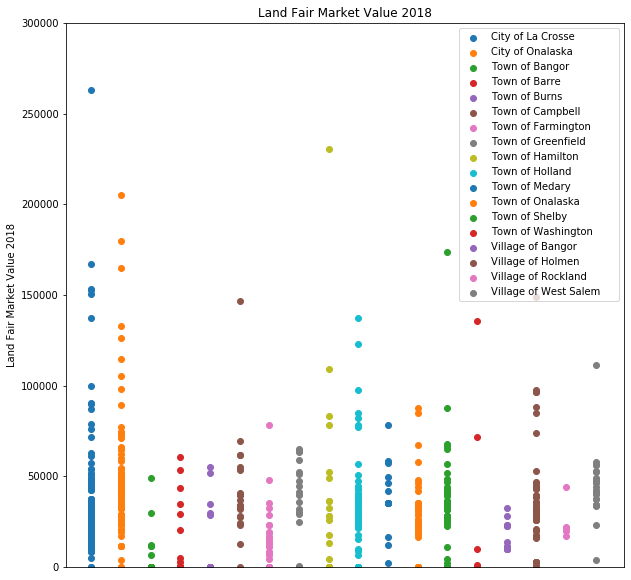

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set(ylim=(0, 300000))
ax.axes.get_xaxis().set_visible(False)
for label, subdf in m_groupby:
    plt.scatter( subdf['Muncipality'] , subdf['LandFairMarketValue2018'], label=label)
    
plt.title('Land Fair Market Value 2018')
plt.ylabel('Land Fair Market Value 2018')
plt.legend()

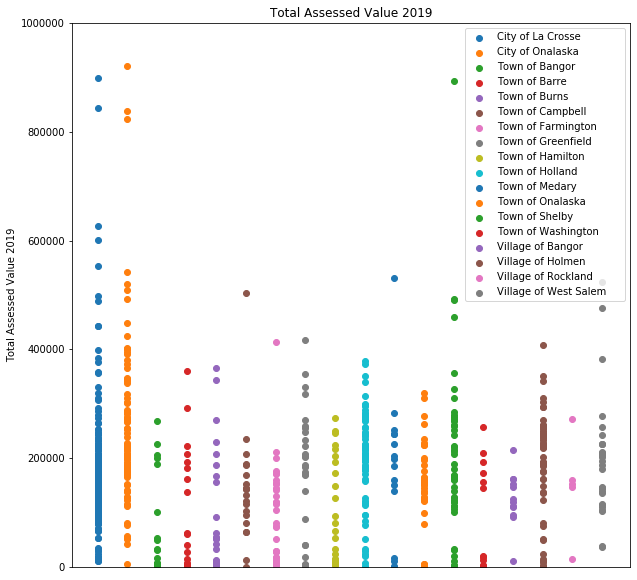

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set(ylim=(0, 1000000))
ax.axes.get_xaxis().set_visible(False)
for label, subdf in m_groupby:
    plt.scatter( subdf['Muncipality'] , subdf['TotalAssessedValue2019'], label=label)
    
plt.title('Total Assessed Value 2019')
plt.ylabel('Total Assessed Value 2019')
plt.legend()

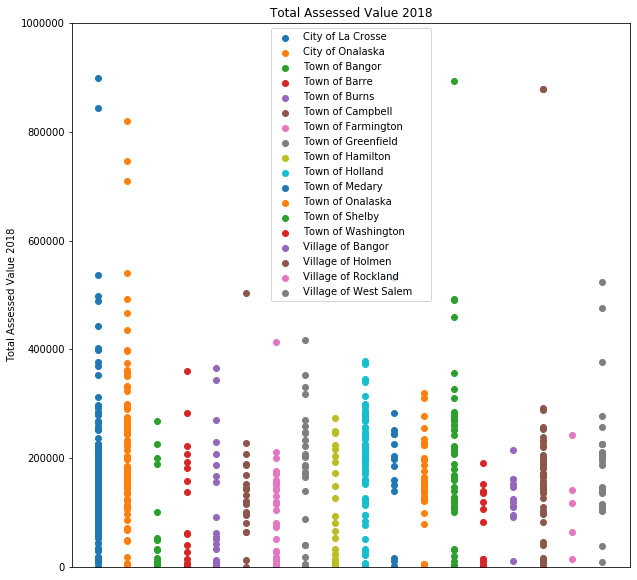

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set(ylim=(0, 1000000))
ax.axes.get_xaxis().set_visible(False)
for label, subdf in m_groupby:
    plt.scatter( subdf['Muncipality'] , subdf['TotalAssessedValue2018'], label=label)
    
plt.title('Total Assessed Value 2018')
plt.ylabel('Total Assessed Value 2018')
plt.legend()

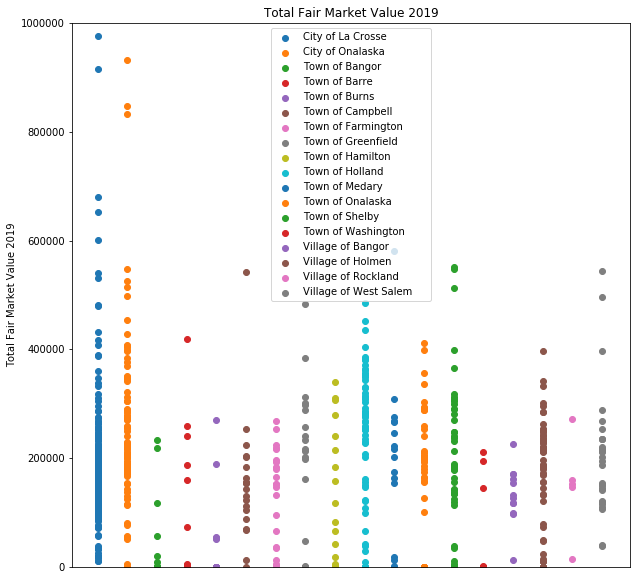

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set(ylim=(0, 1000000))
ax.axes.get_xaxis().set_visible(False)
for label, subdf in m_groupby:
    plt.scatter( subdf['Muncipality'] , subdf['TotalFairMarketValue2019'], label=label)
    
plt.title('Total Fair Market Value 2019')
plt.ylabel('Total Fair Market Value 2019')
plt.legend()

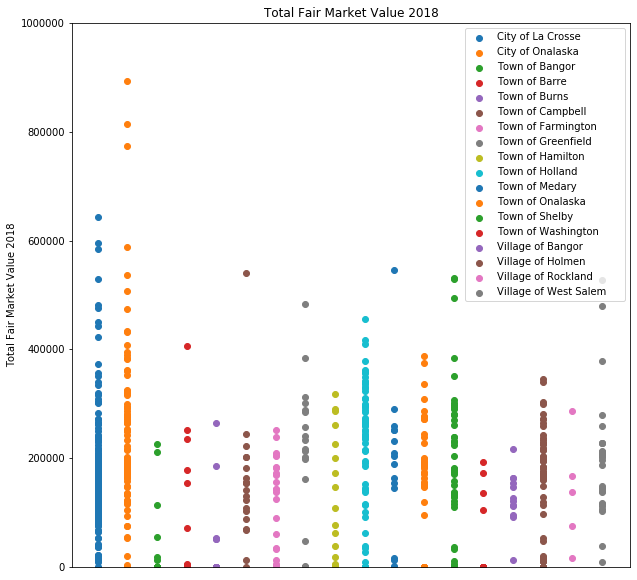

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set(ylim=(0, 1000000))
ax.axes.get_xaxis().set_visible(False)
for label, subdf in m_groupby:
    plt.scatter( subdf['Muncipality'] , subdf['TotalFairMarketValue2018'], label=label)
    
plt.title('Total Fair Market Value 2018')
plt.ylabel('Total Fair Market Value 2018')
plt.legend()

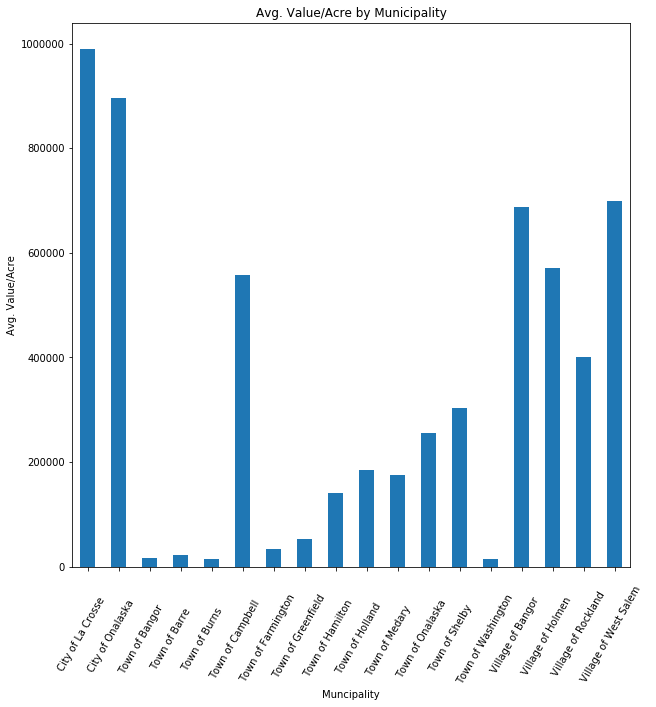

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
plot = m_groupby['AssessedValPerAcre'].mean().plot(kind='bar', rot=60)
plot.set_ylabel("Avg. Value/Acre")
plot.set_title("Avg. Value/Acre by Municipality")
plot

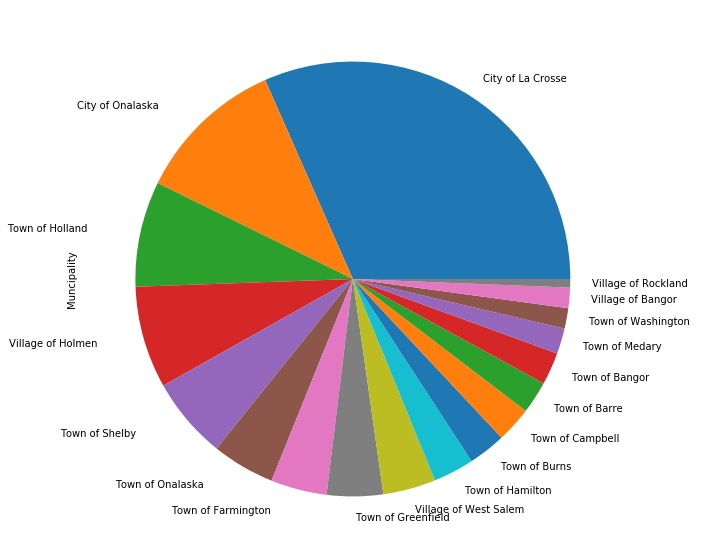

In [36]:
# Displays where data came from and weight of data from that Municipality
fig, ax = plt.subplots(figsize=(10,10))
df['Muncipality'].value_counts().plot(kind='pie')